<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [45]:
df = pd.read_csv("data/dst-3.0_16_1_hh_database.csv", sep=";")

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [46]:
df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [48]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [49]:
df["Образование"] = df["Образование и ВУЗ"].apply(lambda x: x[:x.find(" образование")].lower())
df = df.drop(["Образование и ВУЗ"], axis=1)

print(df["Образование"].value_counts())

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [50]:
df["Пол"] = df["Пол, возраст"].apply(lambda x: x.split(",")[0][0])
df["Возраст"] = df["Пол, возраст"].apply(lambda x: int(x.split(",")[1].split()[0]))
df = df.drop(["Пол, возраст"], axis=1)

print(*df["Пол"].unique(), sep=", ")

М, Ж


In [51]:
women_percent = round(df[df["Пол"] == "Ж"].shape[0] / df["Пол"].shape[0] * 100, 2)
mean_age = round(df["Возраст"].mean(), 1)

print("Процент женских резюме:", str(women_percent) + "%")
print("Cредний возраст соискателей:", mean_age, "лет")

Процент женских резюме: 19.07%
Cредний возраст соискателей: 32.2 лет


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [52]:
def get_experience(data):
    
    miss = "Не указано"
    year = ["лет", "год", "года"]

    if data == miss or data is np.nan:
        
        return np.nan
    
    else:
        experience = [int(i) if i.isdigit() else i for i in data.split()[2:5]]
        month = experience[0] * 12 if experience[1] in year else experience[0]
        month += experience[2] if type(experience[2]) is int else 0 
        
        return month
    

df["Опыт работы (месяц)"] = df["Опыт работы"].apply(get_experience)
df = df.drop(["Опыт работы"], axis=1)

print("Медианный опыт работы (в месяцах):", df["Опыт работы (месяц)"].median())

Медианный опыт работы (в месяцах): 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [53]:
def get_city(data):
    
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    big_city_life = ["Москва", "Санкт-Петербург"]
    
    city = data.split(" ,")[0].split(" (")[0]
    
    if city in million_cities:
        city = "город-миллионник"
    
    elif city not in big_city_life:
        city = "другие"
        
    return city
    
    
def get_moving(data):
    
    pat1 = "готов"
    pat2 = "хочу"
    pat_moving = "не готов"
    
    status = [txt.split(" (")[0] for txt in data.split(" , ") if pat1 in txt or pat2 in txt]
    moving = status[0]
    trip = status[1] if len(status) == 2 else "не готов к командировкам"
    
    return pat_moving not in moving, pat_moving not in trip


df[["Готовность к переезду", "Готовность к командировкам"]] = \
                df["Город, переезд, командировки"].apply(lambda x: pd.Series(get_moving(x)))
df["Город"] = df["Город, переезд, командировки"].apply(get_city)
df = df.drop(["Город, переезд, командировки"], axis=1)

In [54]:
spb_percent = round(df[df["Город"] == "Санкт-Петербург"].shape[0] / df.shape[0] * 100)
print("Процент соискателей, живущих в Санкт-Петербурге:", str(spb_percent) + "%")


pat1 = df["Готовность к переезду"] == True
pat2 = df["Готовность к командировкам"] == True
moving_percent = round(df[pat1 & pat2].shape[0] / df.shape[0] * 100)
print("Процент соискателей, готовых к переезду и к командировкам:", str(moving_percent) + "%")

Процент соискателей, живущих в Санкт-Петербурге: 11%
Процент соискателей, готовых к переезду и к командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [55]:
busy = df["Занятость"].str.split(", ")
BUSY_CAT = np.unique([cat for lst in busy for cat in lst]).tolist()

schedule = df["График"].str.split(", ")
SCHEDULE_CAT = np.unique([cat for lst in schedule for cat in lst]).tolist()


def ohe_busy(data):
    cat_info = [True if cat in data.split(", ") else False for cat in BUSY_CAT]
    return cat_info


def ohe_schedule(data):
    cat_info = [True if cat in data.split(", ") else False for cat in SCHEDULE_CAT]
    return cat_info


df[BUSY_CAT] = df["Занятость"].apply(lambda x: pd.Series(ohe_busy(x)))
df[SCHEDULE_CAT] = df["График"].apply(lambda x: pd.Series(ohe_schedule(x)))

df = df.drop(["График"], axis=1)
df = df.drop(["Занятость"], axis=1)

In [56]:
pat1 = df["волонтерство"] == True
pat2 = df["проектная работа"] == True
print("Проектная работа и волонтёрство:", df[pat1 & pat2].shape[0])

pat1 = df["вахтовый метод"] == True
pat2 = df["гибкий график"] == True
print("Вахтовый метод и гибкий график:", df[pat1 & pat2].shape[0])

Проектная работа и волонтёрство: 436
Вахтовый метод и гибкий график: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [57]:
currency = pd.read_csv("data/ExchangeRates.csv")
currency["date"] = pd.to_datetime(currency["date"]).dt.date

cur_replace = {
    "USD": "USD", "EUR": "EUR",
    "KZT": "KZT", "KGS": "KGS",
    "AZN": "AZN", "бел.руб.": "BYN",
    "грн.": "UAH", "сум": "UZS", 
    "руб.": "RUB"
    }

df["Обновление резюме"] = pd.to_datetime(df["Обновление резюме"]).dt.date
df_salary = df[["Обновление резюме", "ЗП"]].copy()
df_salary["Зарплата"] = df_salary["ЗП"].apply(lambda x: x.split()[0])
df_salary["Валюта"] = df_salary["ЗП"].apply(lambda x: cur_replace[x.split()[1]])

cur_merged = pd.merge(df_salary, currency, how="left",\
                  left_on=["Обновление резюме", "Валюта"], right_on=["date", "currency"])
cur_merged["Зарплата"] = cur_merged["Зарплата"].astype(float)
cur_merged["close"] = cur_merged["close"].fillna(1)
cur_merged["proportion"] = cur_merged["proportion"].fillna(1)

df["ЗП (руб)"] =  cur_merged["Зарплата"] * cur_merged["close"] / cur_merged["proportion"]
df = df.drop(["ЗП"], axis=1)

print("Медианная заработная плата в тысячах:", round(df["ЗП (руб)"].median() / 1000))

Медианная заработная плата в тысячах: 59


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Готовность к переезду            44744 non-null  bool   
 10  Готовность к командировкам       44744 non-null  bool   
 11  Город                            44744 non-null  object 
 12  волонтерство      

----

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [59]:
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

In [60]:
sns_df = pd.DataFrame(df["Возраст"].describe()).T
sns_df["mode"] = df["Возраст"].mode()[0]

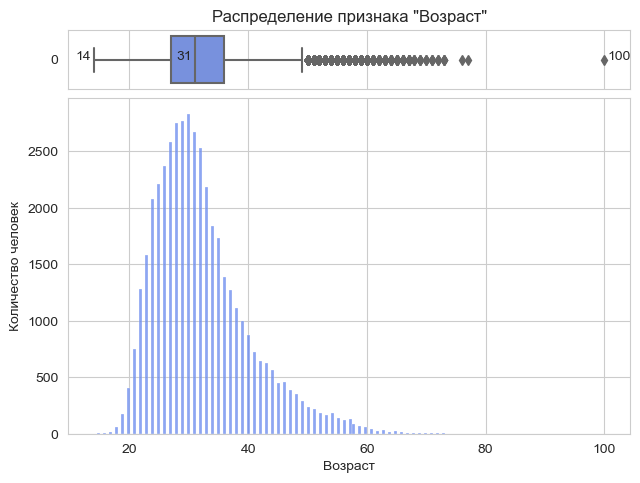

In [61]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns_box = sns.boxplot(data=df["Возраст"], orient="h", ax=ax_box)
sns_box.annotate(str(int(sns_df["min"])), xy=(sns_df["min"]-0.5, 0), ha='right')
sns_box.annotate(str(int(sns_df["50%"])), xy=(sns_df["50%"]-0.5, 0), ha='right')
sns_box.annotate(str(int(sns_df["max"])), xy=(sns_df["max"]+0.5, 0), ha='left')

sns.histplot(data=df, x="Возраст", ax=ax_hist)
ax_box.set(xlabel='')
ax_hist.set(ylabel='Количество человек')
sns_box.set(title='Распределение признака "Возраст"')
plt.tight_layout(pad=0.6);

In [62]:
sns_df

,count,mean,std,min,25%,50%,75%,max,mode
Возраст,44744.0,32.196741,7.9298,14.0,27.0,31.0,36.0,100.0,30


### **Выводы:** 
1. Мода распределения равна 30 годам
2. Минимальное значение - 15 лет, максимальное значение - 100 лет
3. Основная часть наблюдений лежит в диапазоне от 20 до 40 лет, а далее частота наблюдений постепенно падает
4. Явной аномалией является значение 100 лет. При этом есть достаточно большое количество значений за "усами" Сразу к выбросам их причислять нельзя, необходимо посмотреть на зависимость с признаком **"Опыт работы (месяц)"**. Из данных значений (за "усами") к выбросам можно отнести все случаи, когда опыт работы намного меньше возраста

----

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [63]:
sns_df = pd.DataFrame(df["Опыт работы (месяц)"].describe()).T
sns_df["mode"] = df["Опыт работы (месяц)"].mode()[0]

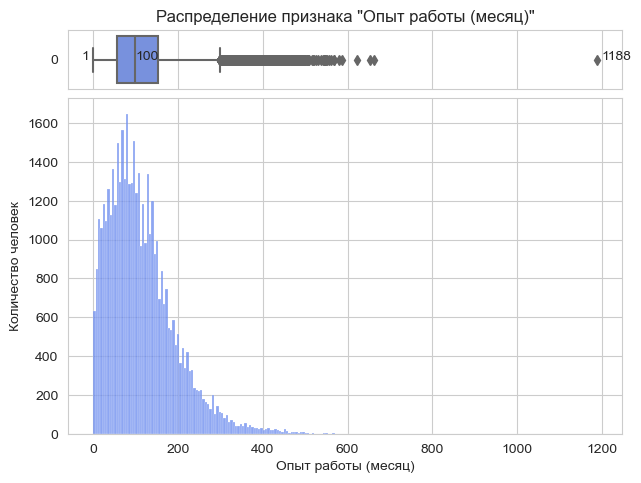

In [64]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns_box = sns.boxplot(data=df["Опыт работы (месяц)"], orient="h", ax=ax_box)

sns_box.annotate(str(int(sns_df["min"])), xy=(sns_df["min"]-10, 0), ha='right')
sns_box.annotate(str(int(sns_df["50%"])), xy=(sns_df["50%"], 0), ha='left')
sns_box.annotate(str(int(sns_df["max"])), xy=(sns_df["max"]+10, 0), ha='left')

sns.histplot(data=df, x="Опыт работы (месяц)", ax=ax_hist)
ax_box.set(xlabel='')
ax_hist.set(ylabel='Количество человек')
sns_box.set(title='Распределение признака "Опыт работы (месяц)"')
plt.tight_layout(pad=0.6);

In [65]:
sns_df

,count,mean,std,min,25%,50%,75%,max,mode
Опыт работы (месяц),44574.0,114.418944,79.047861,1.0,57.0,100.0,154.0,1188.0,81.0


### **Выводы:** 
1. Мода распределения равна 81 месяцу
2. Минимальное значение - 1 месяц, максимальное значение - 1188 месяцев
3. Основная часть наблюдений лежит в диапазоне от 1 до 200 месяцев, а далее частота наблюдений постепенно падает
4. Значение 1188 является аномалией. Аналогично с предыдущем графиком - для поиска аномалий необходимо рассматривать зависимость возраста и опыта работы

-----

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [66]:
sns_df = pd.DataFrame(df["ЗП (руб)"].describe()).T

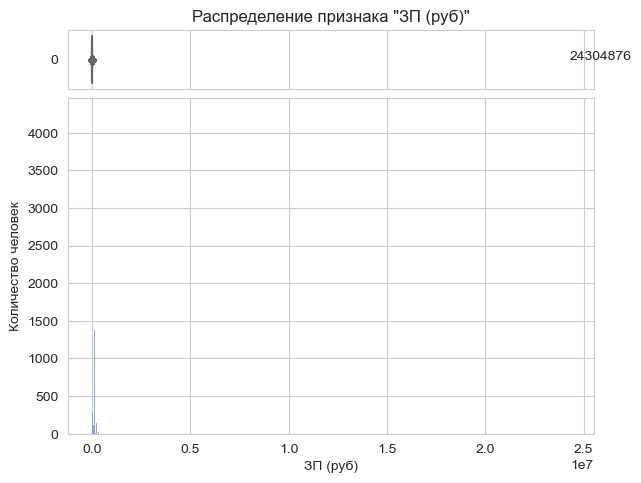

In [67]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns_box = sns.boxplot(data=df["Опыт работы (месяц)"], orient="h", ax=ax_box)

sns_box.annotate(str(int(sns_df["max"])), xy=(sns_df["max"]+10, 0), ha='left')

sns.histplot(data=df, x="ЗП (руб)", ax=ax_hist)
ax_box.set(xlabel='')
ax_hist.set(ylabel='Количество человек')
sns_box.set(title='Распределение признака "ЗП (руб)"')
plt.tight_layout(pad=0.6);

In [68]:
sns_df

,count,mean,std,min,25%,50%,75%,max
ЗП (руб),44744.0,76533.53993,135931.509309,1.0,37082.2,59019.0,95000.0,24304876.0


### **Выводы:** 

В данных есть чересчур большие значения, явные выбросы. На основе статистических показателей половина наблюдений находится в диапазоне от 37к до 95к. Максимальное значение достигает 24 млн, а минимальное значение равно 1 руб.

Аномалии есть, необходимо отсекать слишком большие значения, так как в реальной жизни это может быть либо ошибкой при заполнении, либо индивидуальным случаем.

-----

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

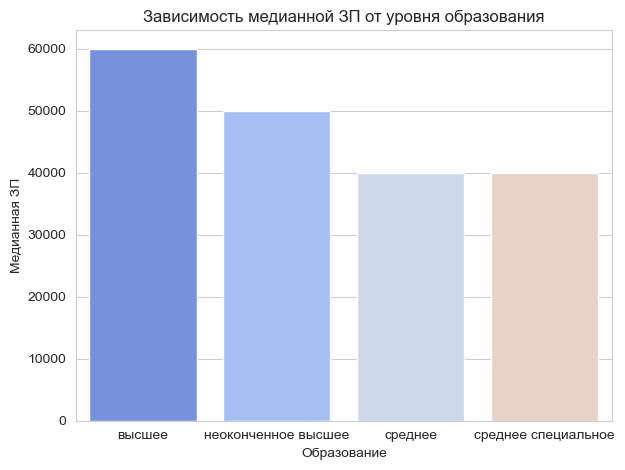

In [69]:
df_million = df[df["ЗП (руб)"] < 1000000]
df_median = df_million.groupby(["Образование"])["ЗП (руб)"].median().reset_index()
sns_fig = sns.barplot(x=df_median["Образование"], y=df_median["ЗП (руб)"])

sns_fig.set(ylabel="Медианная ЗП")
sns_fig.set(title='Зависимость медианной ЗП от уровня образования')
plt.tight_layout();

### **Выводы:** 
1. Для **высшего** уровней образования наблюдается наибольшее значение медианной ЗП (желаемой)
2. Для **среднего** и **среднего cпециального** образования наблюдаются наименьшие значениямедианной ЗП
3. Признак важен, так как отражает реальную ситуацию на рынке для большинства профессий

-----

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

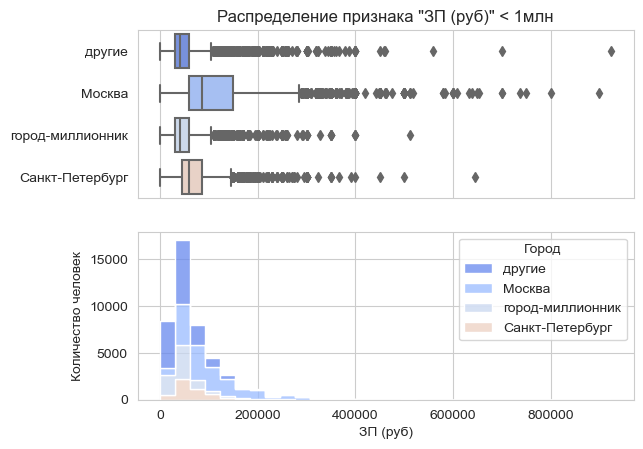

In [70]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
sns_box = sns.boxplot(x=df_million["ЗП (руб)"], y=df_million["Город"], orient="h", ax=ax_box)

sns.histplot(x=df_million["ЗП (руб)"], hue=df_million["Город"], 
             ax=ax_hist, bins=30, element="step", multiple="stack")

ax_box.set(xlabel='')
ax_box.set(ylabel='')
ax_hist.set(ylabel='Количество человек')
sns_box.set(title='Распределение признака "ЗП (руб)" < 1млн');

### **Выводы:** 

В Москвы люди показывают наибольшие ожидания по уровню ЗП, следом идет Санкт-Петербург. Также для Москвы характерен наибольший разброс в желаниях. Миллионники и другие города имеют примерно одинаковые ожидания. Распределения в целом похожи с некоторыми поправками.
Данная картинка соотносится с реальностью - жизнь В Москве обходится дороже всего. Признак **Город** важен. 

-----

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

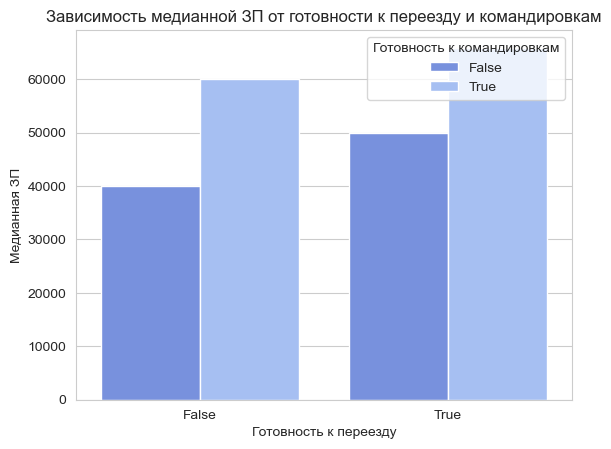

In [71]:
df_moving = df.groupby(["Готовность к переезду", "Готовность к командировкам"])["ЗП (руб)"].median().reset_index()

sns_fig = sns.barplot(
    data=df_moving,
    y="ЗП (руб)",
    x="Готовность к переезду",
    hue='Готовность к командировкам',
)

sns_fig.set_title('Зависимость медианной ЗП от готовности к переезду и командировкам')
sns_fig.set(ylabel="Медианная ЗП");

### **Выводы:** 
1. Специалисты, которые готовы к переезду и к командировкам, показывают наибольшее ожидания от ЗП
2. Готовые к командировкам специалисты ожидают большую ЗП в обеих категориях по признаку "готовность к переезду"
3. В целом гибкие к передвижениям специалисты оценивают свою работу выше

----

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

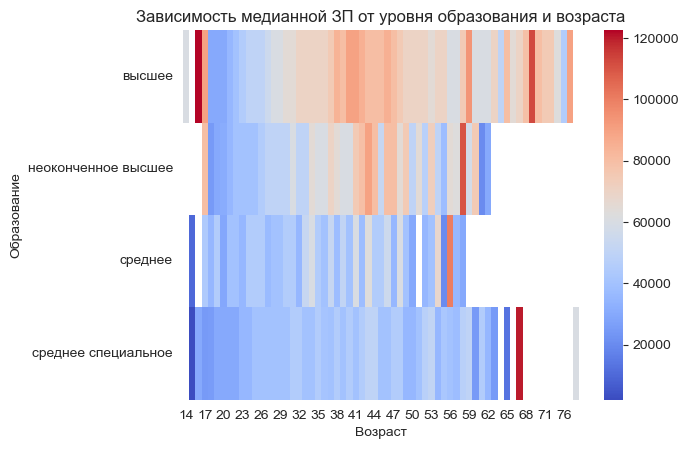

In [72]:
pivot_table = pd.pivot_table(df, 
                             values="ЗП (руб)", 
                             columns="Возраст", 
                             index="Образование", 
                             aggfunc="median")

sns.heatmap(pivot_table, cmap="coolwarm").set(title="Зависимость медианной ЗП от уровня образования и возраста");

### **Выводы:** 
На тепловой карте видно, что люди с **высшим** и **неоконченным высшим** образованием с возрастом стремятся к более высокой ЗП, достигая наиболее стабильно высоких ЗП в диапазоне от 35 до 50 лет. После 50ти лет значения начинают колебаться сильнее. 

Люди со **средним** и **средним специальным** образованием менее требовательны к повышению ЗП - медианные ожидания ЗП колеблются в диапазоне примерно от 30 до 60к на протяжении всей жизни. 

Достаточно характерной чертой является то, что люди с **высшим** образованием продолжают искать работу в достаточно пожилом возрасте.

-----

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

Аномалии: 7


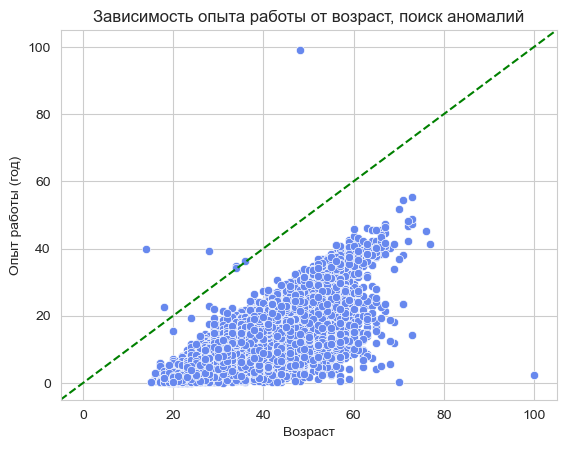

In [73]:
df["Опыт работы (год)"] = df["Опыт работы (месяц)"] / 12.

sns_fig = sns.scatterplot(x=df["Возраст"], y=df["Опыт работы (год)"])
sns_fig.axline((0, 0), (100, 100), c="g", ls="--")
sns_fig.set(title="Зависимость опыта работы от возраст, поиск аномалий");

print("Аномалии:", df[df["Опыт работы (год)"] - df["Возраст"] > 0].shape[0])
df = df.drop(["Опыт работы (год)"], axis=1)

### **Выводы:** 
На диаграмме видно, что есть одиночные выбросы. Например, при возрасте 100 лет указан маленький опыт. Есть примеры, когда опыт работы превышает возраст. Такие случаи необходимо обрабатывать и удалять из данных.

----

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


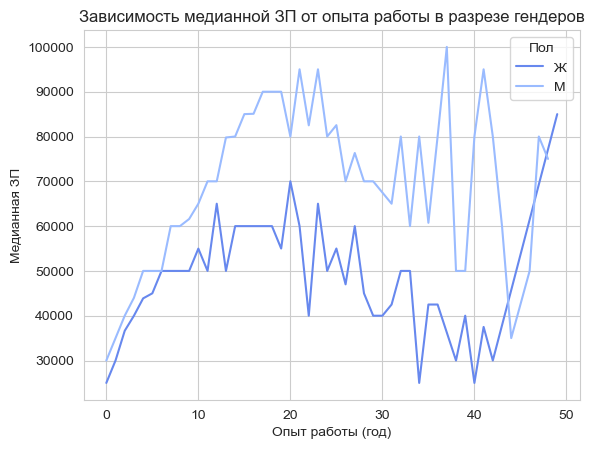

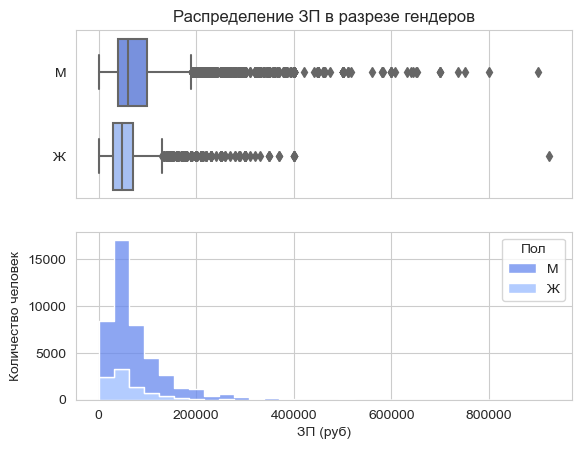

In [74]:
# Для лучшей визуализации ограничем опыт работы 50 годами, ЗП меньше миллиона
df_million["Опыт работы (год)"] = (df_million["Опыт работы (месяц)"] / 12).round()
df_million_sex = df_million[df_million["Опыт работы (год)"] <= 50].groupby(["Пол", "Опыт работы (год)"])["ЗП (руб)"].median().reset_index()
sns_line = sns.lineplot(x=df_million_sex["Опыт работы (год)"], y=df_million_sex["ЗП (руб)"], hue=df_million_sex["Пол"])
sns_line.set(ylabel="Медианная ЗП")
sns_line.set(title='Зависимость медианной ЗП от опыта работы в разрезе гендеров');
plt.show()


# Для этой визуализации опыт работы не ограничен, ЗП меньше миллиона
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
sns_box = sns.boxplot(x=df_million["ЗП (руб)"], y=df_million["Пол"], orient="h", ax=ax_box)

sns.histplot(x=df_million["ЗП (руб)"], hue=df_million["Пол"], ax=ax_hist, bins=30, element="step", multiple="stack")

ax_box.set(xlabel='')
ax_box.set(ylabel='')
ax_hist.set(ylabel='Количество человек')
sns_box.set(title='Распределение ЗП в разрезе гендеров');

### **Выводы:** 

В среднем на всем карьерном пути женщины запрашивают за свою работу меньше мужчин. Признак **Пол** важный.

-----

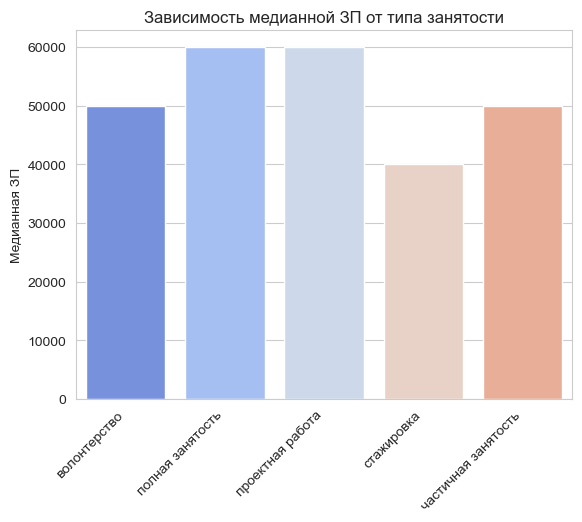

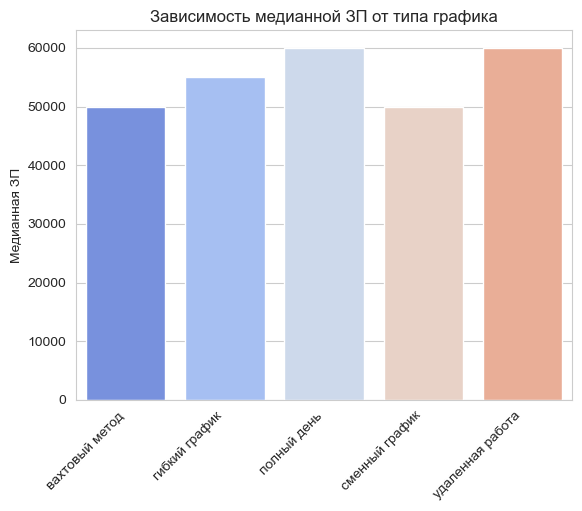

In [75]:
temp = []
for t in BUSY_CAT:
    temp.append(df_million[df_million[t] == True]["ЗП (руб)"].median())
    
     
sns_bar = sns.barplot(x=BUSY_CAT, y=temp)
sns_bar.set_xticklabels(sns_bar.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
sns_bar.set(title='Зависимость медианной ЗП от типа занятости')
sns_bar.set(ylabel="Медианная ЗП");
plt.show()


temp = []
for t in SCHEDULE_CAT:
    temp.append(df_million[df_million[t] == True]["ЗП (руб)"].median())
    
sns_bar = sns.barplot(x=SCHEDULE_CAT, y=temp)
sns_bar.set_xticklabels(sns_bar.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
sns_bar.set(title='Зависимость медианной ЗП от типа графика')
sns_bar.set(ylabel="Медианная ЗП");

### **Выводы:** 
На графике с типом занятости вполне закономерно показано, что за **стажировки** ожидают небольшую ЗП, а **полная занятость** и **проектная работа** показывают наиболее высокие ожидания по ЗП. 

На второй диаграмме (с типами графика) видно, что за **полный день** или **удаленную работу** ожидания по ЗП наиболее высокие. 

Однако медианные значения ЗП рассчитаны без разбивки на города. Москва и Питер достаточно дорогие города для жизни, интересно посмотреть на значения медианной ЗП в разрезе городов.

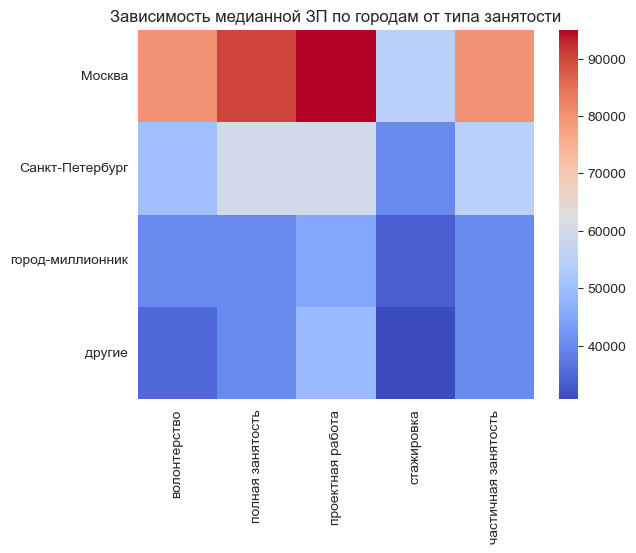

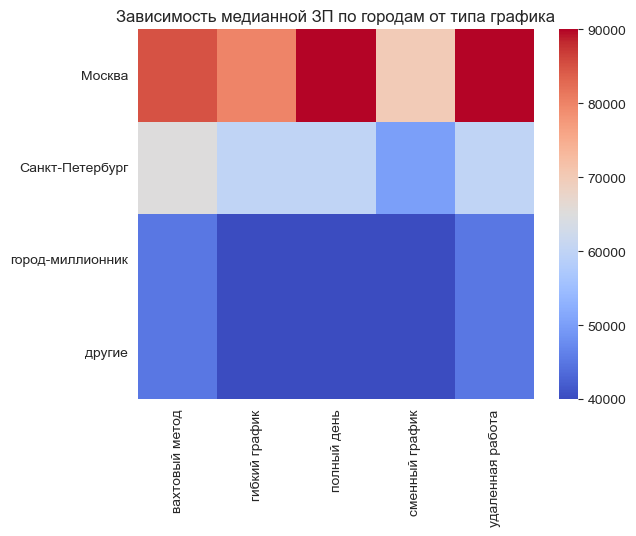

In [76]:
df_temp = pd.DataFrame()

for t in BUSY_CAT:
    df_temp[t] = df_million[df_million[t] == True][["ЗП (руб)", "Город"]].groupby("Город").median()

sns_heat = sns.heatmap(df_temp, cmap="coolwarm")
sns_heat.set(ylabel='')
sns_heat.set(title='Зависимость медианной ЗП по городам от типа занятости')
plt.show()


df_temp = pd.DataFrame()

for t in SCHEDULE_CAT:
    df_temp[t] = df_million[df_million[t] == True][["ЗП (руб)", "Город"]].groupby("Город").median()

sns_heat = sns.heatmap(df_temp, cmap="coolwarm")
sns_heat.set(ylabel='')
sns_heat.set(title='Зависимость медианной ЗП по городам от типа графика');

### **Выводы:** 

На тепловой карте с типом занятости отчетливо видно, что за **стажировку** наименьшие ожидания ЗП во всех городах. Признак важный.

На тепловой карте с типом графика интересной особенностью является распределение медианных ЗП для **городов-миллионников** и **других** - за вахтовый метод и удаленную работа соискатели запрашивают более высокую ЗП, чем за полный день, гибкий и сменные графики. Это соотносится с реальностью, например, сейчас есть возможность работать удаленно на московскую компанию, но жить в небольшом городе. 

------

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [77]:
mask = df.duplicated(subset=list(df.columns))
df_duplicates = df[mask]
print("Число найденных дубликатов:", df_duplicates.shape[0])

df = df.drop_duplicates()
print("Результирующее число записей:", df.shape[0])

Число найденных дубликатов: 161
Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [78]:
df.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Готовность к переезду                0
Готовность к командировкам           0
Город                                0
волонтерство                         0
полная занятость                     0
проектная работа                     0
стажировка                           0
частичная занятость                  0
вахтовый метод                       0
гибкий график                        0
полный день                          0
сменный график                       0
удаленная работа                     0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [79]:
df = df.dropna(subset=["Последнее/нынешнее место работы", "Последняя/нынешняя должность"])

values = {
    "Опыт работы (месяц)": df["Опыт работы (месяц)"].median()
    }
df = df.fillna(values)

print("Среднее значение в столбце «Опыт работы (месяц)»:", round(df["Опыт работы (месяц)"].mean()))

Среднее значение в столбце «Опыт работы (месяц)»: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [80]:
del_pat1 = df["ЗП (руб)"] > 1000000
del_pat2 = df["ЗП (руб)"] < 1000

df_anomaly = df[del_pat1 | del_pat2] 
print("Число найденных аномалий:", df_anomaly.shape[0])

df = df.drop(df_anomaly.index)
print("Результирующее число записей:", df.shape[0])

Число найденных аномалий: 89
Результирующее число записей: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [81]:
del_pat3 = df["Возраст"] - df["Опыт работы (месяц)"] / 12 < 0

df_trash = df[del_pat3] 
print("Число найденных выбросов:", df_trash.shape[0])

df = df.drop(df_trash.index)
print("Результирующее число записей:", df.shape[0])

Число найденных выбросов: 7
Результирующее число записей: 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

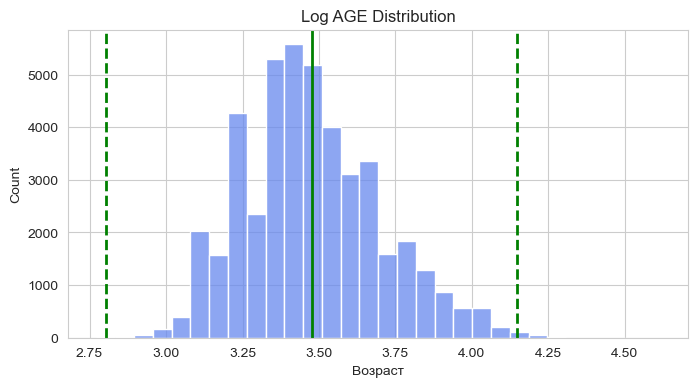

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(df["Возраст"] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color="g", lw=2)
histplot.axvline(log_age.mean() + 3 * log_age.std(), color="g", ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color="g", ls='--', lw=2)
histplot.set_title("Log AGE Distribution");

Распределение имеет правостороннюю асимметрию

In [83]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    
    return outliers, cleaned

outliers, cleaned = outliers_z_score(df, "Возраст", log_scale=True, left=3, right=4)
print("Число выбросов по методу z-отклонения:", outliers.shape[0])
print("Результирующее число записей:", cleaned.shape[0])

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


In [84]:
outliers

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Готовность к переезду,...,полная занятость,проектная работа,стажировка,частичная занятость,вахтовый метод,гибкий график,полный день,сменный график,удаленная работа,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,среднее,М,15,2.0,False,...,False,False,False,True,False,True,False,True,True,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,среднее специальное,М,15,3.0,False,...,True,False,False,False,False,False,True,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,False,...,True,True,True,True,False,True,True,False,True,60000.0


Под категорию выбросов попадают люди с возрастом 15 и 100 лет